## 1. 데이터의 기본 정보 파악하기

- 데이터셋 리스트
    - 1. olist_customers_dataset.csv
    - 2. olist_geolocation_dataset.csv
    - 3. olist_order_items_dataset.csv
    - 4. olist_order_payments_dataset.csv
    - 5. olist_order_reviews_dataset.csv
    - 6. olist_orders_dataset.csv
    - 7. olist_products_dataset.csv
    - 8. olist_sellers_dataset.csv
    - 9. product_category_name_translation.csv

- <img src="../../img/relation.png" width=800>

### 1) 데이터의 크기 및 기본 정보
----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "../../dataset/"

-----
#### [1] olist_customers_dataset.csv
##### [유저 정보 데이터셋]
- customer_id : 유저 식별 번호(id) - 주문 발생에 매핑하기 위한 번호.
- customer_unique_id : 유저 고유 식별 번호(id) - 고유 식별을 위한 번호, 재구매 추적을 위한 케이스를 예시로 생각할 수 있음.
- customer_zip_code_prefix : 유저 우편번호(주소정보)
- customer_city : 유저 도시정보
- customer_state : 유저 도시정보(한 단계 상위 개념)

In [38]:
olist_customers_dataset = pd.read_csv(data_dir + "olist_customers_dataset.csv")
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
olist_customers_dataset['customer_id'].nunique()

99441

In [5]:
len(olist_customers_dataset['customer_id'].unique())

99441

In [6]:
len(olist_customers_dataset['customer_unique_id'].unique())

96096

-----
#### [2] olist_geolocation_dataset.csv
##### [주소 정보 데이터셋]
- geolocation_zip_code_prefix : 우편번호(주소정보)
- geolocation_lat : 위도 정보
- geolocation_lng : 경도 정보
- geolocation_city : 도시정보
- geolocation_state : 도시정보(한 단계 상위 개념)

In [7]:
olist_geolocation_dataset = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
olist_geolocation_dataset['geolocation_zip_code_prefix'].nunique()

19015

-----
#### [3] olist_order_items_dataset.csv
##### [주문 정보 데이터셋]
- order_id : 주문 아이디
- order_item_id : 한 주문에 몇 개를 주문했는지에 관한 정보
- product_id : 상품 아이디
- seller_id : 판매자 아이디
- shipping_limit_date : 판매자 배송 제한 날짜
- price : 상품 가격
- freight_value : 배송비

In [9]:
olist_order_items_dataset = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
olist_order_items_dataset.shape

(112650, 7)

-----
#### [4] olist_order_payments_dataset.csv
##### [결제 정보 데이터셋]
- order_id : 주문 아이디
- payment_sequential : 결제한 방법의 수
- payment_type : 결제 종류
- payment_installments : 할부 개월 수
- payment_value : 결제 가격

In [11]:
olist_order_payments_dataset = pd.read_csv(data_dir + "olist_order_payments_dataset.csv")
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
olist_order_payments_dataset['order_id'].nunique()

99440

In [16]:
olist_order_payments_dataset['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

-----
#### [5] olist_order_reviews_dataset.csv
##### [리뷰 정보 데이터셋]
- review_id : 댓글의 고유 식별 번호(id)
- order_id : 주문 아이디
- review_score : 리뷰 점수
- review_comment_title : 리뷰 제목
- review_comment_message : 리뷰 내용
- review_creation_date : 리뷰 단 시간
- review_answer_timestamp : 만족도 설문조사 답변 시간

In [17]:
olist_order_reviews_dataset = pd.read_csv(data_dir + "olist_order_reviews_dataset.csv")
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
olist_order_reviews_dataset['review_id'].nunique()

99173

In [20]:
olist_order_reviews_dataset['order_id'].nunique()

99441

In [21]:
olist_order_reviews_dataset['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

-----
#### [6] olist_orders_dataset.csv
##### [배송 정보 데이터셋]
- order_id : 주문 아이디
- customer_id : 유저 아이디
- order_status : 주문 상태
- order_purchase_timestamp : 주문 시간
- order_approved_at : 주문 확정 시간
- order_delivered_carrier_date : 물류센터 도착 시간
- order_delivered_customer_date : 유저에게 배송 완료 시간
- order_estimated_delivery_date : 유저가 보는 예상 배송일

In [22]:
olist_orders_dataset = pd.read_csv(data_dir + "olist_orders_dataset.csv")
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
olist_orders_dataset.shape

(99441, 8)

In [24]:
olist_orders_dataset['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

-----
#### [7] olist_products_dataset.csv
##### [상품 정보 데이터셋]
- product_id : 상품 아이디
- product_category_name : 상품 카테고리명
- product_name_lenght : 상품명 텍스트 길이
- product_description_lenght : 상품 상세설명 텍스트 길이
- product_photos_qty : 상품 상세설명 이미지 갯수
- product_weight_g : 상품 무게 (그램 단위)
- product_length_cm : 상품 길이 (cm 단위)
- product_height_cm : 상품 높이 (cm 단위)
- product_width_cm : 상품 너비 (cm 단위)

In [25]:
olist_products_dataset = pd.read_csv(data_dir + "olist_products_dataset.csv")
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
olist_products_dataset['product_id'].nunique()

32951

In [27]:
olist_products_dataset['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

-----
#### [8] olist_sellers_dataset.csv
##### [판매자 정보 데이터셋]
- seller_id : 판매자 아이디
- seller_zip_code_prefix : 판매자 우편번호(주소정보)
- seller_city : 판매자 도시정보
- seller_state : 판매자 도시정보(한 단계 상위 개념)

In [28]:
olist_sellers_dataset = pd.read_csv(data_dir + "olist_sellers_dataset.csv")
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
olist_sellers_dataset['seller_id'].nunique()

3095

-----
#### [9] product_category_name_translation.csv
##### [상품 카테고리 정보 영문명 매핑]
- product_category_name : 브라질 카테고리명
- product_category_name_english : 영문 카테고리명

In [32]:
product_category_name = pd.read_csv(data_dir + "product_category_name_translation.csv")
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


----
## 2. 데이터 병합 준비하기
### 1) 데이터셋 세부 정보 파악하기

In [33]:
olist_customers_dataset = pd.read_csv(data_dir + "olist_customers_dataset.csv")
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [34]:
empty_df = pd.DataFrame(columns=['a', 'b', 'c', 'd'])
empty_df = empty_df.append({'a': 1, 'b': 9, 'c': 9, 'd': 2}, ignore_index=True)
empty_df = empty_df.append({'a': 0, 'b': 6, 'c': 1, 'd': 3}, ignore_index=True)
empty_df.head()

,a,b,c,d
0,1,9,9,2
1,0,6,1,3


In [35]:
info_df = pd.DataFrame(columns=['row_num', 'col_num', 'name', 'pk'])

def info_df_row(name, pk, file_name):
    temp_df = pd.read_csv(data_dir + file_name)
    return {'row_num': temp_df.shape[0], 'col_num': temp_df.shape[1], 'name': name, 'pk': pk}

In [36]:
info_df = info_df.append(info_df_row("customer_data", 
                                     "customer_id", 
                                     "olist_customers_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("location_data", 
                                     "geolocation_zip_code_prefix", 
                                     "olist_geolocation_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("order_data", 
                                     "order_id", 
                                     "olist_order_items_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("payment_data", 
                                     "order_id", 
                                     "olist_order_payments_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("review_data", 
                                     "review_id", 
                                     "olist_order_reviews_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("shipping_data", 
                                     "order_id", 
                                     "olist_orders_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("product_data", 
                                     "product_id", 
                                     "olist_products_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("seller_data", 
                                     "seller_id", 
                                     "olist_sellers_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("category_data", 
                                     "product_category_name", 
                                     "product_category_name_translation.csv"), ignore_index=True)

In [37]:
info_df

,row_num,col_num,name,pk
0,99441,5,customer_data,customer_id
1,1000163,5,location_data,geolocation_zip_code_prefix
2,112650,7,order_data,order_id
3,103886,5,payment_data,order_id
4,100000,7,review_data,review_id
5,99441,8,shipping_data,order_id
6,32951,9,product_data,product_id
7,3095,4,seller_data,seller_id
8,71,2,category_data,product_category_name


----
### 2) 데이터셋의 열 정보 파악하기

In [39]:
olist_customers_dataset = pd.read_csv(data_dir + "olist_customers_dataset.csv")
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
olist_customers_dataset = pd.DataFrame(olist_customers_dataset).astype('category')
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  category
 1   customer_unique_id        99441 non-null  category
 2   customer_zip_code_prefix  99441 non-null  category
 3   customer_city             99441 non-null  category
 4   customer_state            99441 non-null  category
dtypes: category(5)
memory usage: 7.5 MB


In [47]:
data = [(3, 'a'),
        (2, 'b'),
        (1, 'c'),
        (0, 'd')]
pd.DataFrame.from_records(data, columns=['col_1', 'col_2']).head()

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [46]:
unique_counts = pd.DataFrame.from_records([(col, olist_customers_dataset[col].nunique()) for col in olist_customers_dataset.columns],
                          columns=['col_name', 'num_category'])
unique_counts.head()

,col_name,num_category
0,customer_id,99441
1,customer_unique_id,96096
2,customer_zip_code_prefix,14994
3,customer_city,4119
4,customer_state,27


----
### 3) 데이터셋의 결측치 및 이상치 탐색하기

In [49]:
olist_products_dataset = pd.read_csv(data_dir + "olist_products_dataset.csv")
print(olist_products_dataset.shape)
print(olist_products_dataset.info())

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [54]:
olist_products_dataset.isnull()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
32946,False,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False
32948,False,False,False,False,False,False,False,False,False
32949,False,False,False,False,False,False,False,False,False


In [53]:
olist_products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [55]:
olist_products_dataset = olist_products_dataset.dropna()
olist_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [56]:
# olist_products_dataset = olist_products_dataset.fillna("some_value")

<AxesSubplot:>

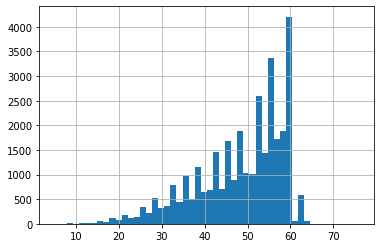

In [57]:
olist_products_dataset['product_name_lenght'].hist(bins=50)

<AxesSubplot:>

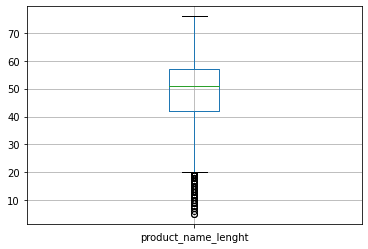

In [58]:
olist_products_dataset.boxplot(column=['product_name_lenght'])

----
## 3. 데이터셋 병합 실행하기
### 1) merge() 함수로 데이터 병합하기

In [59]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [60]:
df1

,a,b
0,foo,1
1,bar,2


In [61]:
df2

,a,c
0,foo,3
1,baz,4


In [62]:
df1 = df1.merge(df2, how='left', on='a')
df1.head()

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


----
### 2) 주문 데이터 기준으로 데이터 병합하기

In [118]:
order_df = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
print(order_df.shape)
shipping_df = pd.read_csv(data_dir + "olist_orders_dataset.csv")
print(shipping_df.shape)
product_df = pd.read_csv(data_dir + "olist_products_dataset.csv")
print(product_df.shape)
user_df = pd.read_csv(data_dir + "olist_customers_dataset.csv")
print(user_df.shape)
location_df = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
print(location_df.shape)
product_category_df = pd.read_csv(data_dir + "product_category_name_translation.csv")
print(product_category_df.shape)

(112650, 7)
(99441, 8)
(32951, 9)
(99441, 5)
(1000163, 5)
(71, 2)


In [119]:
order_df['order_id'] = order_df['order_id'].astype(str)
shipping_df['order_id'] = shipping_df['order_id'].astype(str)
order_df = order_df.merge(shipping_df, how='left', on='order_id')

In [120]:
order_df.shape

(112650, 14)

In [121]:
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [122]:
order_df['product_id'] = order_df['product_id'].astype(str)
product_df['product_id'] = product_df['product_id'].astype(str)
order_df = order_df.merge(product_df, how='left', on='product_id')
order_df.shape

(112650, 22)

In [123]:
order_df['customer_id'] = order_df['customer_id'].astype(str)
user_df['customer_id'] = user_df['customer_id'].astype(str)
order_df = order_df.merge(user_df, how='left', on='customer_id')
order_df.shape

(112650, 26)

In [124]:
location_df['geolocation_zip_code_prefix'].nunique()

19015

In [125]:
location_df.shape

(1000163, 5)

In [126]:
# customer_zip_code_prefix를 str 타입으로 변환한다
order_df['customer_zip_code_prefix'] = order_df['customer_zip_code_prefix'].astype(str)

# geolocation_zip_code_prefix를 str 타입으로 변환한다
location_df['geolocation_zip_code_prefix'] = location_df['geolocation_zip_code_prefix'].astype(str)
location_df.columns = ['customer_zip_code_prefix', 'lat', 'lng', 'city', 'state']

# customer_zip_code_prefix를 그룹으로 하여 lat과 lng는 평균 값을 계산, city와 state는 그룹 내 첫 번째 값을 가져온다.
location_df = location_df.groupby('customer_zip_code_prefix').agg({'lat': 'mean', 'lng': 'mean', 'city': 'first', 'state': 'first'}).reset_index()

# order_df에 location_df를 left join 방식으로 병합한다
order_df = order_df.merge(location_df, how='left', on='customer_zip_code_prefix')
order_df.shape

(112650, 30)

In [127]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'lat',
       'lng', 'city', 'state'],
      dtype='object')

In [128]:
order_df['product_category_name'] = order_df['product_category_name'].astype(str)
product_category_df['product_category_name'] = product_category_df['product_category_name'].astype(str)
order_df = order_df.merge(product_category_df, how='left', on='product_category_name')
order_df.shape

(112650, 31)